<center><h1 style="font-size:2em;color:#2467C0"><h1 style="font-size:2em;color:#2467C0">Análise e exploração dos dados</h1>

## Objetivo deste estudo: 

* O intuito deste notebook é apresentar de forma clara e sucinta a análise e exploração orientados aos dados, tratamentos esses que irão partir dos princípios:

* Plote de gráficos;

* Obter insights;

* Saída de uma base CSV;

## Importar bibliotecas
<br> Começaremos importando as bibliotecas Python que usaremos nesta análise. Essas bibliotecas incluem:
<ul>
<li> <b> pandas </b> e <b> numpy </b> para ingestão e manipulação de dados. </li>
<li> <b> matplotlib </b> e <b> seaborn </b> para visualização de dados </li>
<li> <b> missingno </b>, que contém funções que exibem valores ausentes </li>
<li> <b> Sklearn </b> que contém funções para execução das transformações dos dados e a importância das variáveis pelo modelo </li>

</ul>

In [1]:
# Bibliotecas para criação e manipulação de DATAFRAMES e Algebra 
import pandas as pd 
import numpy as np

# Bibliotecas para geração de gráficos
import matplotlib.pyplot as plt 
import seaborn as sns

# Bibliotecas para execução das transformações dos dados e a importância das variáveis pelo modelo
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

* Função para plotar feature importance

In [2]:
# Função para plotar gráfico feature importance
def plot_feature_importance(model):
    tmp=pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp=tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (10,18))
    plt.title('Features importance',fontsize=20)
    s=sns.barplot(y='Feature',x='Feature importance',data=tmp)
    s.set_yticklabels(s.get_yticklabels(),rotation=360)
    plt.show()

* Carregando os dados .csv

* Agora, precisaremos ler o conjunto de dados usando os comandos abaixo.

In [3]:
# Carregando os dados
data=pd.read_csv('data_aed.csv', sep=';')
print ('O dataset tem %s linhas e %s colunas' % (data.shape[0], data.shape[1]))

O dataset tem 16376 linhas e 46 colunas


* Avaliando a existência de desiquilibrio nas classes de não venda e venda da variável resposta

In [4]:
# Contadondo e % da distibuição das classes que compõem a coluna venda

Count_Normal_transacation = len(data[data['venda']==0])
Count_Fraud_transacation = len(data[data['venda']==1]) 

Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of normal transacation       :', Percentage_of_Normal_transacation)
print('Number of normal transaction   :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of fraud transacation        :',Percentage_of_Fraud_transacation*100)
print('Number of fraud transaction    :', Count_Fraud_transacation)

% of normal transacation       : 0.7048119198827553
Number of normal transaction   : 11542
% of fraud transacation        : 29.518808011724474
Number of fraud transaction    : 4834


* Entendimento da correlação linear

* O método de correlação que será utilizado no estudo será o padrão da função .corr(), será o coeficiente de correlação Pearson, que é uma medida de correlação linear entre duas variáveis. Seu valor está entre -1 e +1, onde -1 indicando correlação linear negativa total, 0 indicando nenhuma correlação linear e 1 indicando correlação linear positiva total.

* O Sinal de cada coeficiente indica a direção da relação, se ela é positiva ou negativa. Se ambas variáveis tendem a aumentar ou diminuir em um conjunto, o coeficiente é positivo, e a linha que representa a correlação inclina para cima. Se uma variável tende a aumentar à medida que outra diminui, o coeficiente é negativo, e a linha que representa a correlação inclina para baixo.

* Pontos aleatórios no gráfico, sem correlação linear entre as variáveis

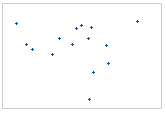

* Alguns pontos próximos da linha, mas outros bem dispersos dela, o que indica apenas uma relação linear moderada entre as variáveis

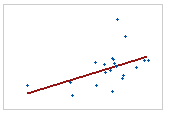

* Os pontos estão próximos da linha, o que indica que temos uma forte correlação line-ar entre as variáveis e é positiva, pois conforme uma variável aumenta, a outra também tem o mesmo movimento

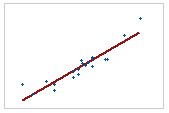

* Os pontos estão próximo da linha, o que indica que temos uma forte relação negativa entre as variáveis, pois conforme uma variável aumenta, a outra diminui

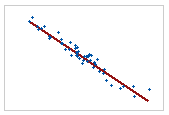

* Matriz de correlação das variáveis de recarga com a variável alvo venda

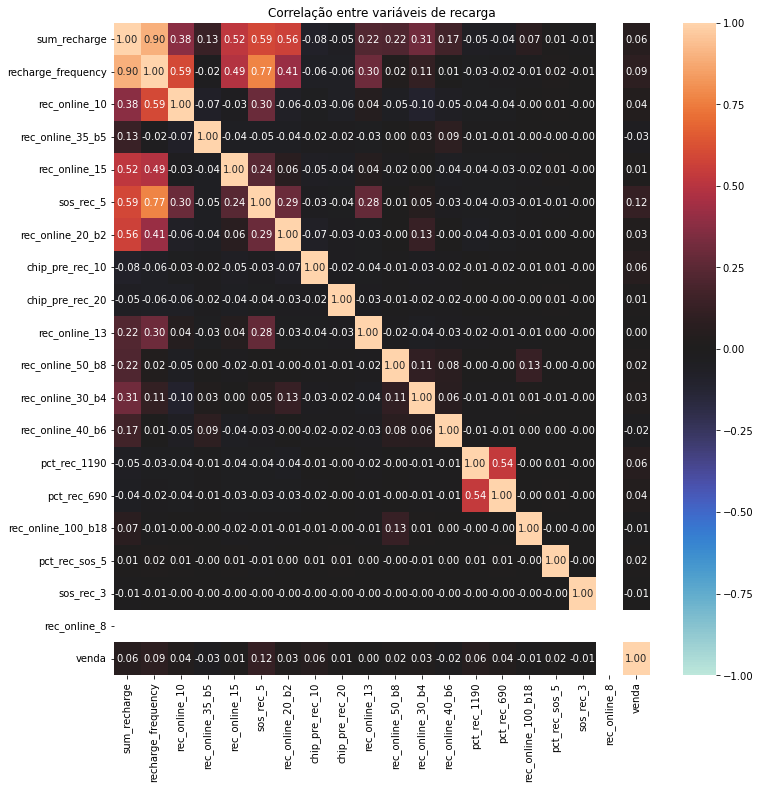

In [5]:
# Matriz de correlação
plt.figure(figsize=(12, 12))
sns.heatmap((data.loc[:, ['sum_recharge', 'recharge_frequency', 'rec_online_10',
                          'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 
                          'rec_online_20_b2','chip_pre_rec_10', 'chip_pre_rec_20', 
                          'rec_online_13','rec_online_50_b8','rec_online_30_b4', 
                          'rec_online_40_b6','pct_rec_1190','pct_rec_690', 
                          'rec_online_100_b18', 'pct_rec_sos_5','sos_rec_3', 
                          'rec_online_8', 'venda']]).corr(),
            annot=True,
            fmt='.2f',
            vmin=-1, 
            vmax=1, 
            center=0)
plt.title('Correlação entre variáveis de recarga')
plt.show()

* Plotar gráfico de dispersão para auxilio da avaliação de correlação linear entre as variáveis

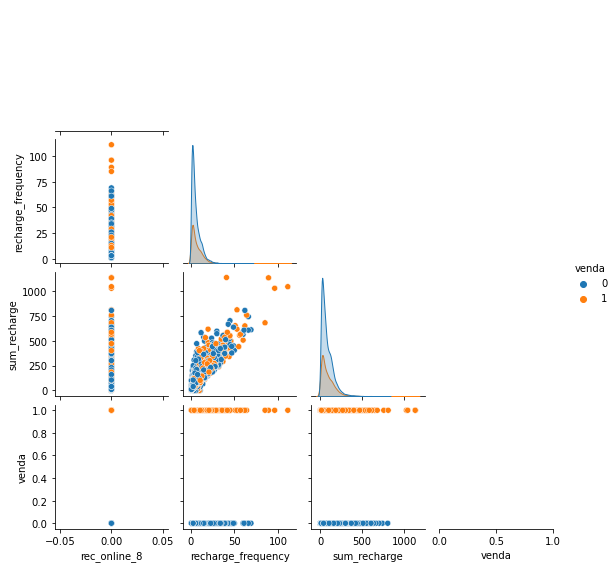

In [6]:
sns.pairplot(data, hue="venda", vars=['rec_online_8', 
                                      'recharge_frequency', 
                                      'sum_recharge',
                                      'venda'], size=2, diag_kind="kde", corner=True);

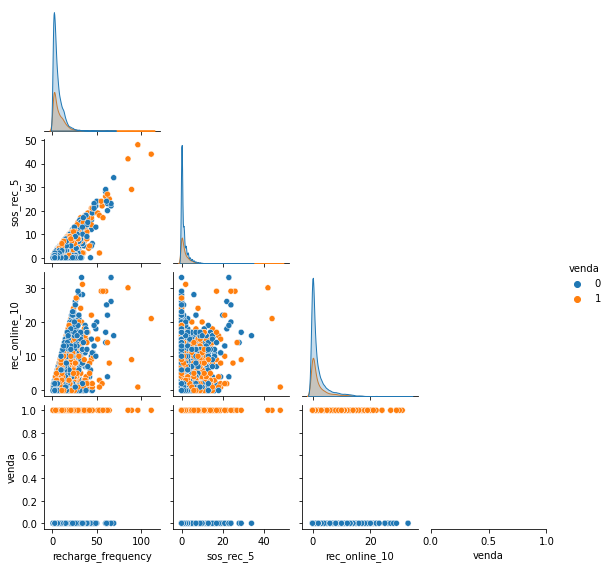

In [7]:
sns.pairplot(data, hue="venda", vars=['recharge_frequency', 
                                      'sos_rec_5', 
                                      'rec_online_10',
                                      'venda'], size=2, diag_kind="kde", corner=True);

* Matriz de correlação das variáveis de serviço com o alvo venda

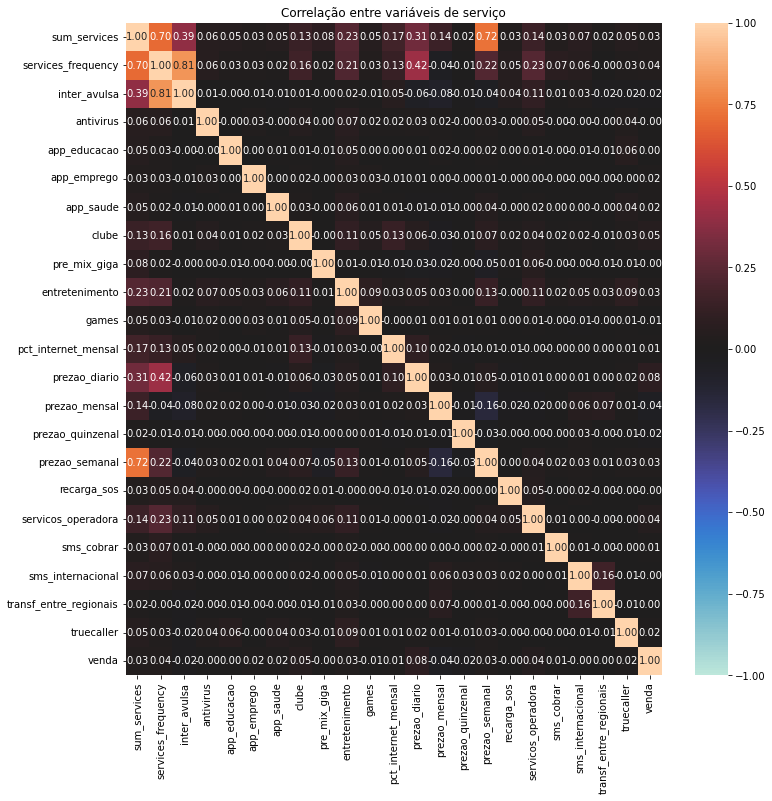

In [8]:
# Matriz de correlação
plt.figure(figsize=(12, 12))
sns.heatmap((data.loc[:, ['sum_services', 'services_frequency','inter_avulsa', 
                          'antivirus', 'app_educacao', 'app_emprego', 
                          'app_saude','clube', 'pre_mix_giga', 
                          'entretenimento', 'games','pct_internet_mensal', 
                          'prezao_diario', 'prezao_mensal','prezao_quinzenal', 
                          'prezao_semanal', 'recarga_sos','servicos_operadora', 
                          'sms_cobrar', 'sms_internacional','transf_entre_regionais', 
                          'truecaller', 'venda']]).corr(),
            annot=True,
            fmt='.2f',
            vmin=-1, 
            vmax=1, 
            center=0)
plt.title('Correlação entre variáveis de serviço')
plt.show()

* Plotar gráfico de dispersão para auxilio da avaliação de correlação linear entre as variáveis

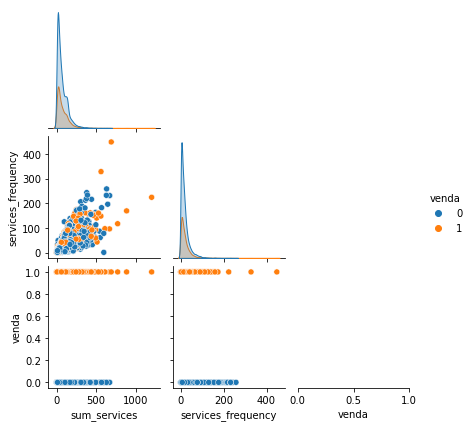

In [9]:
sns.pairplot(data, hue="venda", vars=['sum_services', 
                                      'services_frequency',
                                      'venda'], size=2, diag_kind="kde", corner=True);

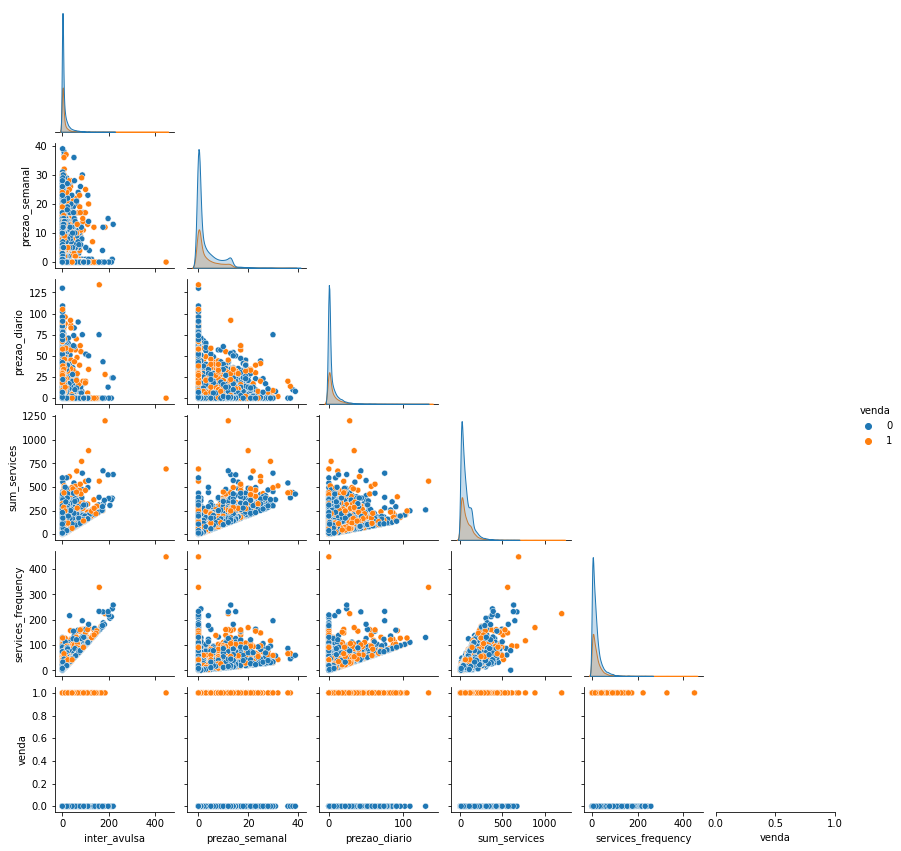

In [10]:
sns.pairplot(data, hue="venda", vars=['inter_avulsa', 
                                      'prezao_semanal',
                                      'prezao_diario',
                                      'sum_services',
                                      'services_frequency',
                                      'venda'], size=2, diag_kind="kde", corner=True);

* Correlação das variáveis com a venda

* Detectando e filtrando valores discrepantes nas variáveis de recargas

* Estatísticas simples do nosso conjunto de dados de recargas

In [11]:
# Estatísticas simples
data.loc[:, ['sum_recharge', 'recharge_frequency', 'rec_online_10',
             'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
             'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
             'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
             'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
             'sos_rec_3', 'rec_online_8']].describe().T

,count,mean,std,min,25%,50%,75%,max
sum_recharge,16376.0,82.675696,77.137051,0.0,30.0,60.0,118.0,1133.0
recharge_frequency,16376.0,6.333842,6.238281,1.0,2.0,4.0,9.0,111.0
rec_online_10,16376.0,1.913166,3.299767,0.0,0.0,1.0,2.0,33.0
rec_online_35_b5,16376.0,0.078041,0.436381,0.0,0.0,0.0,0.0,9.0
rec_online_15,16376.0,1.295249,2.456976,0.0,0.0,0.0,2.0,36.0
sos_rec_5,16376.0,1.305264,2.427992,0.0,0.0,0.0,2.0,48.0
rec_online_20_b2,16376.0,1.071385,1.933577,0.0,0.0,0.0,1.0,29.0
chip_pre_rec_10,16376.0,0.040730,0.197671,0.0,0.0,0.0,0.0,1.0
chip_pre_rec_20,16376.0,0.015938,0.135993,0.0,0.0,0.0,0.0,6.0
rec_online_13,16376.0,0.305997,1.109285,0.0,0.0,0.0,0.0,42.0


* Podemos observar que boa parte das variáveis de recargas estão o desvio padrão muito baixo e isso pode afetar a distribuição e fazer com que o algoritmo fique enviesado para variáveis com maior ordem de grandeza.

* Histograma para visualização da distribuição das variáveis de recargas

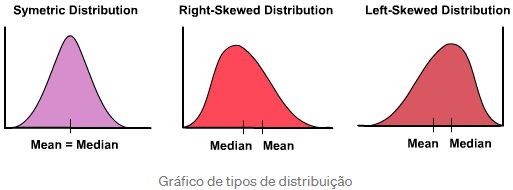

<function matplotlib.pyplot.show(close=None, block=None)>

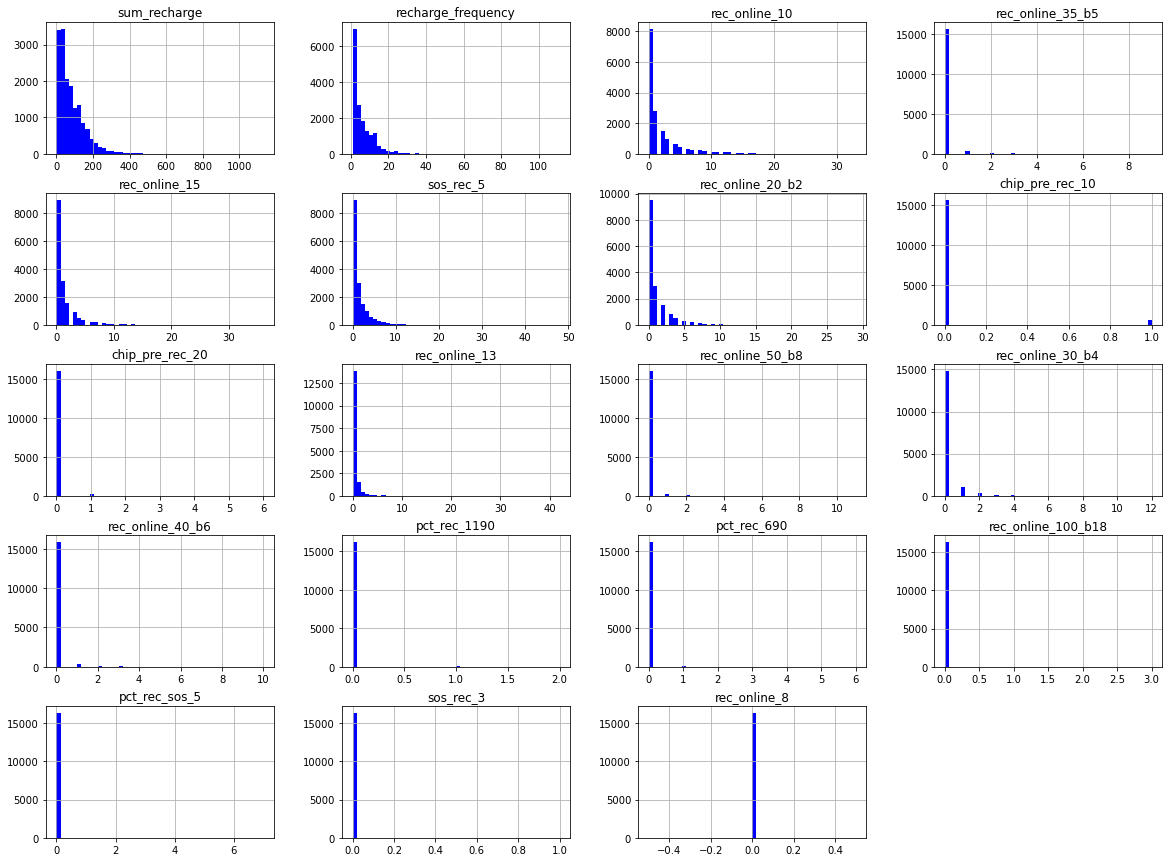

In [12]:
# Visualização da distribuição das variáveis de recargas

data.loc[:, ['sum_recharge', 'recharge_frequency', 'rec_online_10',
             'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
             'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
             'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
             'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
             'sos_rec_3', 'rec_online_8']].hist (bins=50, figsize=(20,15), color="blue")
plt.show

* Podemos observar que as variáveis sum_recharge, recharge_frequency, rec_online_10, rec_online_15, sos_rec_5, rec_ online_20_b2 e rec_online_13 estão com valores discrepantes, destoando das suas medidas centrais e a distribuição não é normal, tendo assim uma distribuição assimétrica à direita devido ao alto numero de valores zerados ou próximo a zero. As demais variáveis, como vimos anteriormente, estão com alto índice de valores zerados e coeficiente nulo ou quase nulo.

* Plotar outlier sum_recharge

<AxesSubplot:>

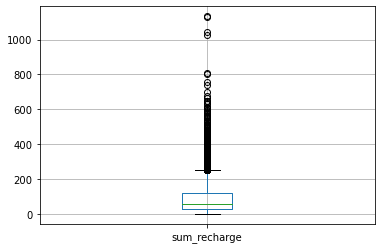

In [13]:
data.boxplot(column='sum_recharge')

In [14]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'recharge_frequency', 'rec_online_10', 'rec_online_35_b5', 
                    'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 600).any(1)]

,sum_recharge,venda
1271,615.0,1
1402,740.0,0
2453,756.0,1
3323,609.0,0
4222,630.0,0
4929,1133.0,1
5236,700.0,0
5685,809.0,1
9252,650.0,1
9346,648.0,1


* Plotar outlier recharge_frequency

<AxesSubplot:>

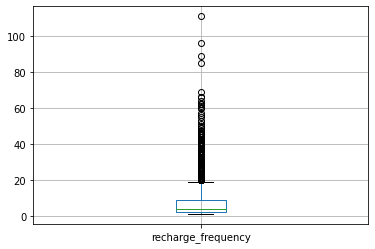

In [15]:
data.boxplot(column='recharge_frequency')

In [16]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'rec_online_10','rec_online_35_b5', 
                    'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 65).any(1)]

,recharge_frequency,venda
1402,66.0,0
3323,69.0,0
10483,96.0,1
10696,111.0,1
11389,89.0,1
12802,85.0,1
15048,66.0,0


* Plotar rec_online_15

<AxesSubplot:>

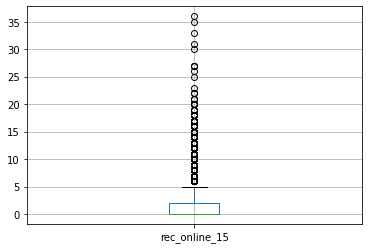

In [17]:
data.boxplot(column='rec_online_15')

In [18]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'rec_online_10','rec_online_35_b5', 
                    'recharge_frequency', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 23).any(1)]

,rec_online_15,venda
588,27.0,0
3377,30.0,0
5236,26.0,0
5685,36.0,1
5755,27.0,0
6361,31.0,1
10483,35.0,1
11389,25.0,1
12912,33.0,1
15174,27.0,0


* Plotar sos_rec_5

<AxesSubplot:>

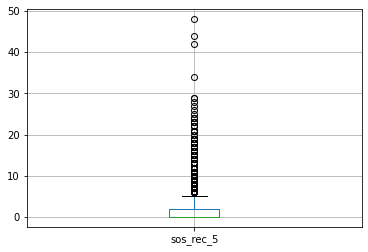

In [19]:
data.boxplot(column='sos_rec_5')

In [20]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'rec_online_10','rec_online_35_b5', 
                    'recharge_frequency', 'rec_online_15', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 29).any(1)]

,sos_rec_5,venda
3323,34.0,0
10483,48.0,1
10696,44.0,1
12802,42.0,1


* Plotar rec_online_20_b2

<AxesSubplot:>

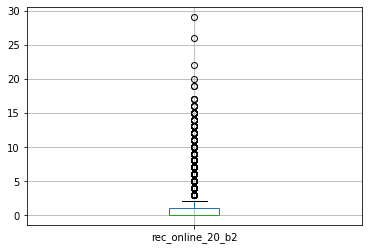

In [21]:
data.boxplot(column='rec_online_20_b2')

In [22]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'rec_online_10','rec_online_35_b5', 
                    'recharge_frequency', 'rec_online_15', 'sos_rec_5',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 17).any(1)]

,rec_online_20_b2,venda
2391,19.0,0
2453,20.0,1
3433,19.0,0
5046,29.0,0
11389,26.0,1
13139,22.0,1


* Plotar rec_online_13

<AxesSubplot:>

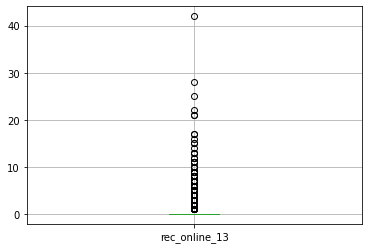

In [23]:
data.boxplot(column='rec_online_13')

In [24]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'rec_online_10','rec_online_35_b5', 
                    'recharge_frequency', 'rec_online_15', 'sos_rec_5',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_20_b2',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 17).any(1)]

,rec_online_13,venda
1063,22.0,0
7808,28.0,1
7973,21.0,1
8138,25.0,1
10696,42.0,1
13159,21.0,0


* Plotar rec_online_30_b4

<AxesSubplot:>

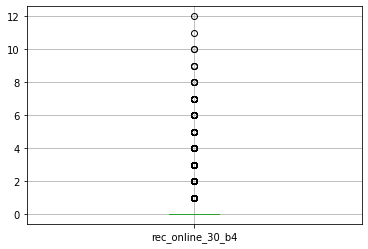

In [25]:
data.boxplot(column='rec_online_30_b4')

In [26]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'rec_online_10','rec_online_35_b5', 
                    'recharge_frequency', 'rec_online_15', 'sos_rec_5',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_20_b2',
                    'rec_online_50_b8', 'rec_online_13', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 10).any(1)]

,rec_online_30_b4,venda
4929,11.0,1
7608,12.0,0


* Detectando e filtrando valores discrepantes serviços

* Estatísticas simples do nosso conjunto de dados de serviços

In [27]:
# Estatísticas simples
data.loc[:, ['sum_services', 'services_frequency',
             'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
             'clube', 'pre_mix_giga', 'entretenimento', 'games',
             'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
             'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
             'servicos_operadora', 'sms_cobrar', 'sms_internacional',
             'transf_entre_regionais', 'truecaller']].describe().T

,count,mean,std,min,25%,50%,75%,max
sum_services,16376.0,68.549771,68.741957,0.01,19.98,46.18,100.1125,1202.26
services_frequency,16376.0,18.651380,21.593588,1.00,5.00,12.00,24.0000,448.00
inter_avulsa,16376.0,8.404433,18.052572,0.00,0.00,1.00,8.0000,447.00
antivirus,16376.0,0.016182,0.323597,0.00,0.00,0.00,0.0000,21.00
app_educacao,16376.0,0.019174,0.276508,0.00,0.00,0.00,0.0000,10.00
app_emprego,16376.0,0.015816,0.324181,0.00,0.00,0.00,0.0000,16.00
app_saude,16376.0,0.011419,0.260225,0.00,0.00,0.00,0.0000,13.00
clube,16376.0,0.376099,1.715855,0.00,0.00,0.00,0.0000,155.00
pre_mix_giga,16376.0,0.070103,0.908972,0.00,0.00,0.00,0.0000,43.00
entretenimento,16376.0,0.595078,2.344888,0.00,0.00,0.00,0.0000,40.00


* Histograma para visualização da distribuição das variáveis de serviços

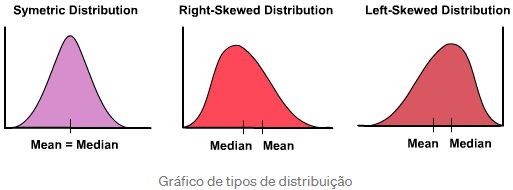

<function matplotlib.pyplot.show(close=None, block=None)>

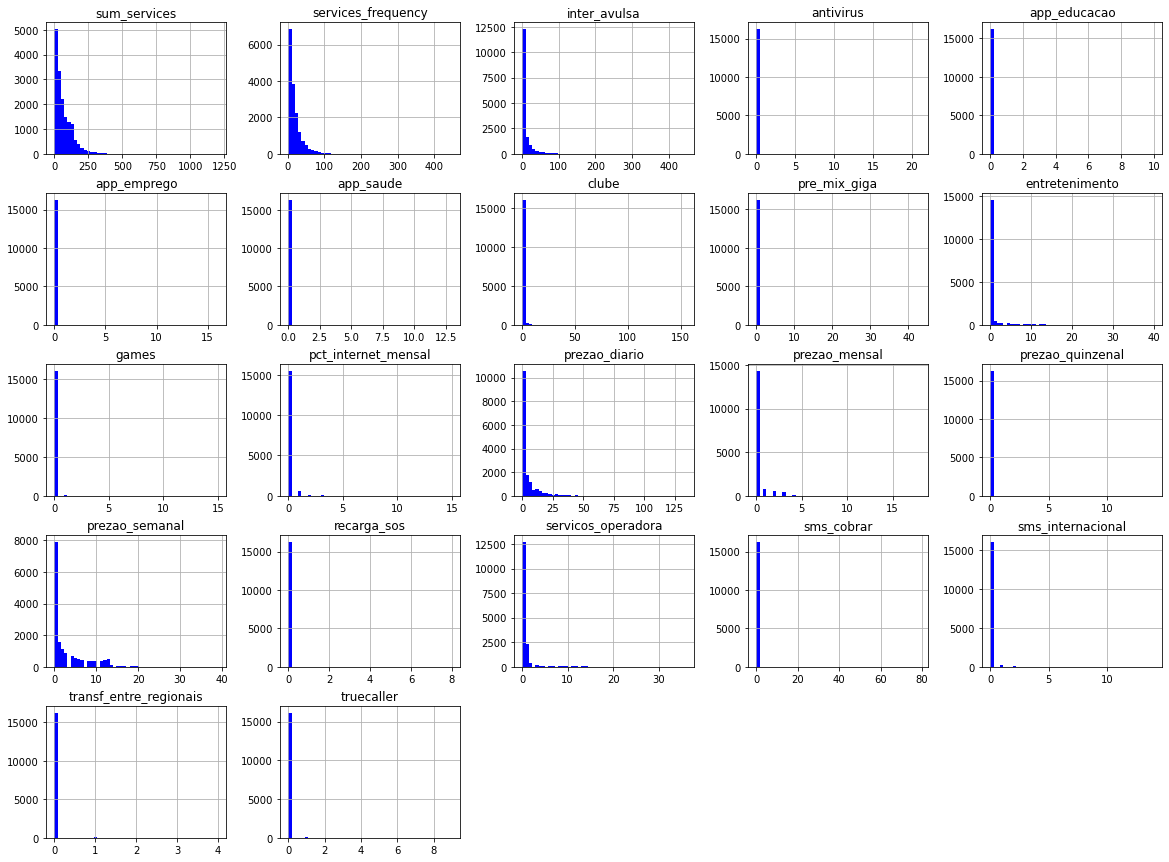

In [28]:
# Visualização da distribuição das variáveis de serviços
data.loc[:, ['sum_services', 'services_frequency',
             'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
             'clube', 'pre_mix_giga', 'entretenimento', 'games',
             'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
             'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
             'servicos_operadora', 'sms_cobrar', 'sms_internacional',
             'transf_entre_regionais', 'truecaller']].hist (bins=50, figsize=(20,15), color="blue")
plt.show

* Podemos observar que as variáveis sum_services, services_frequency, inter_avulsa, prezao_diario, prezao_mensal, prezao_semanal, serviços_operadora e clube estão com valores discrepantes, destoando das suas medidas centrais e a distribuição não é normal, tendo assim uma distribuição assimétrica à direita devido ao alto número de valores zerados ou próximo a zero. As demais variáveis, como vimos anteriormente, estão com alto índice de valores zerados e coeficiente nulo ou quase nulo.

* Plotar sum_services

<AxesSubplot:>

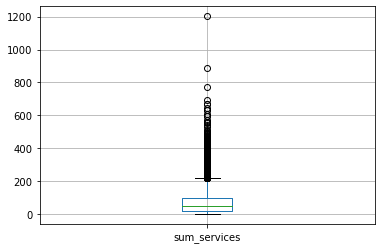

In [29]:
data.boxplot(column='sum_services')

In [30]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 550).any(1)]

,sum_services,venda
1271,669.54,1
1344,552.39,0
1402,647.07,0
4929,1202.26,1
5046,632.84,0
5236,671.96,0
5685,772.47,1
6244,611.00,1
9252,560.94,1
9438,597.36,0


* Plotar services_frequency

<AxesSubplot:>

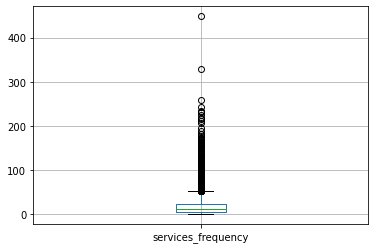

In [31]:
data.boxplot(column='services_frequency')

In [32]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services','inter_avulsa', 
                    'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 235).any(1)]

,services_frequency,venda
30,243.0,0
5046,258.0,0
10483,448.0,1
10696,328.0,1


* Plotar inter_avulsa

<AxesSubplot:>

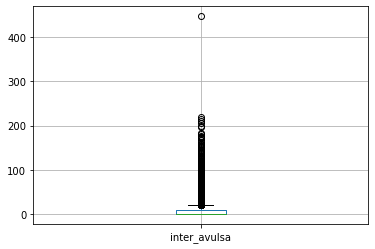

In [33]:
data.boxplot(column='inter_avulsa')

In [34]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 185).any(1)]

,inter_avulsa,venda
30,215.0,0
2102,205.0,0
3323,211.0,0
5046,219.0,0
10483,447.0,1
13004,200.0,0
13897,197.0,0


* Plotar prezao_diario 

<AxesSubplot:>

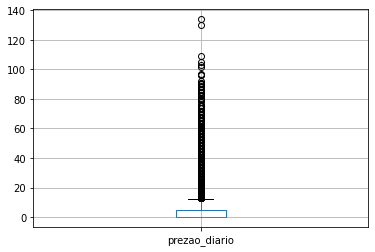

In [35]:
data.boxplot(column='prezao_diario')

In [36]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego',
                    'clube', 'pre_mix_giga', 'entretenimento', 'games', 'app_saude',
                    'pct_internet_mensal', 'prezao_mensal', 'prezao_quinzenal', 
                    'prezao_semanal', 'recarga_sos', 'servicos_operadora', 
                    'sms_cobrar', 'sms_internacional', 'transf_entre_regionais', 
                    'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 90).any(1)]

,prezao_diario,venda
394,103.0,1
2094,97.0,1
2598,102.0,0
4458,96.0,1
6425,109.0,0
7808,92.0,1
7828,91.0,0
8271,130.0,0
10696,134.0,1
11147,96.0,0


* Plotar clube

<AxesSubplot:>

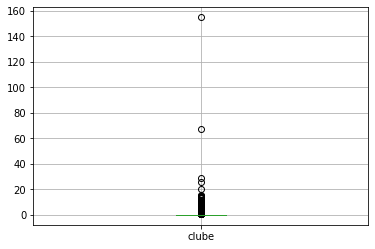

In [37]:
data.boxplot(column='clube')

In [38]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'pre_mix_giga', 'entretenimento', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 19).any(1)]

,clube,venda
2973,20.0,0
4222,29.0,0
8170,155.0,0
11954,67.0,0
14714,26.0,1


* Plotar entretenimento

<AxesSubplot:>

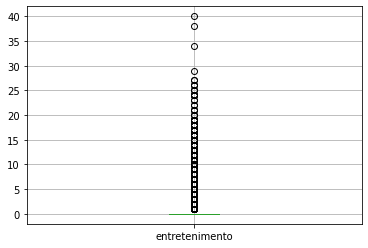

In [39]:
data.boxplot(column='entretenimento')

In [40]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'pre_mix_giga', 'clube', 'games',
                    'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 27).any(1)]

,entretenimento,venda
9622,34.0,0
13769,40.0,0
13872,29.0,0
14880,38.0,1


* Plota pct_internet_mensal

<AxesSubplot:>

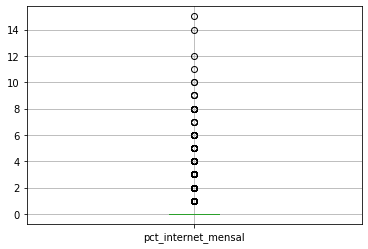

In [41]:
data.boxplot(column='pct_internet_mensal')

In [42]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'pre_mix_giga', 'clube', 'games',
                    'entretenimento', 'prezao_diario', 'prezao_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 9).any(1)]

,pct_internet_mensal,venda
2550,12.0,0
5068,10.0,0
5978,15.0,1
8170,11.0,0
11860,10.0,0
16359,14.0,0


* Plotar prezao_mensal

<AxesSubplot:>

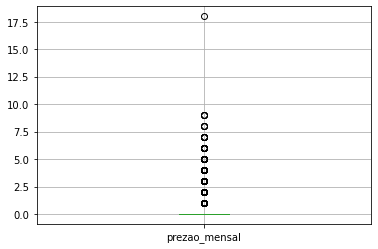

In [43]:
data.boxplot(column='prezao_mensal')

In [44]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'pre_mix_giga', 'clube', 'games',
                    'entretenimento', 'prezao_diario', 'pct_internet_mensal',
                    'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 8).any(1)]

,prezao_mensal,venda
890,9.0,0
3585,9.0,0
12126,9.0,0
13769,18.0,0
15891,9.0,0


* Plotar prezao_semanal

<AxesSubplot:>

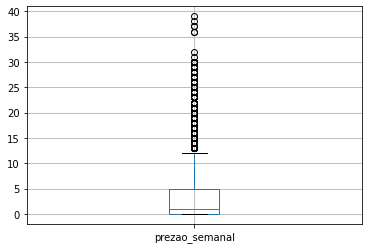

In [45]:
data.boxplot(column='prezao_semanal')

In [46]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'pre_mix_giga', 'clube', 'games',
                    'entretenimento', 'prezao_diario', 'pct_internet_mensal',
                    'prezao_quinzenal', 'prezao_mensal', 'recarga_sos',
                    'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 32).any(1)]

,prezao_semanal,venda
123,36.0,0
3515,37.0,0
4752,38.0,0
6966,37.0,1
15907,39.0,0
16302,36.0,1


* Plotar servicos_operadora

<AxesSubplot:>

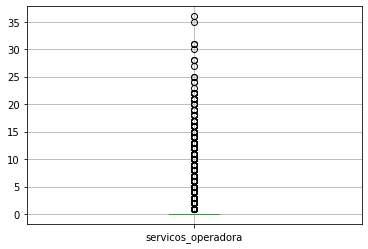

In [47]:
data.boxplot(column='servicos_operadora')

In [48]:
# selecionar todas as linhas que tem valores discrepantes
outliers=data.drop(['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
                    'sum_recharge', 'recharge_frequency', 'rec_online_10',
                    'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                    'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                    'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                    'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                    'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
                    'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                    'pre_mix_giga', 'clube', 'games',
                    'entretenimento', 'prezao_diario', 'pct_internet_mensal',
                    'prezao_quinzenal', 'prezao_mensal', 'recarga_sos',
                    'prezao_semanal', 'sms_cobrar', 'sms_internacional',
                    'transf_entre_regionais', 'truecaller'], axis=1) 

outliers[(np.abs(outliers)> 25).any(1)]

,servicos_operadora,venda
89,31.0,0
3390,31.0,1
3895,30.0,0
10696,35.0,1
11777,28.0,1
13153,28.0,0
13951,36.0,0
14137,27.0,0


* Podemos observar que as variáveis sum_services e services_frequency, inter_avulsa, prezao_diario e clube no ultimo quartil estão com valores discrepantes, destoando das sua medidas centrais.

* Tratamento de outliers de variáveis de serviços

* Describe dataset

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
regional,16376.0,4.868527,2.818845,0.00,2.00,5.00,8.0000,8.00
idade_cliente,16376.0,22.050623,20.190853,-2.00,-1.00,24.00,36.0000,98.00
plan_type,16376.0,2.720445,0.865847,0.00,3.00,3.00,3.0000,3.00
Qnt_abandono,16376.0,1.261053,0.740497,1.00,1.00,1.00,1.0000,16.00
sum_recharge,16376.0,82.675696,77.137051,0.00,30.00,60.00,118.0000,1133.00
recharge_frequency,16376.0,6.333842,6.238281,1.00,2.00,4.00,9.0000,111.00
rec_online_10,16376.0,1.913166,3.299767,0.00,0.00,1.00,2.0000,33.00
rec_online_35_b5,16376.0,0.078041,0.436381,0.00,0.00,0.00,0.0000,9.00
rec_online_15,16376.0,1.295249,2.456976,0.00,0.00,0.00,2.0000,36.00
sos_rec_5,16376.0,1.305264,2.427992,0.00,0.00,0.00,2.0000,48.00


* Verificando a distribuição das classes de venda e não venda

<AxesSubplot:xlabel='venda', ylabel='count'>

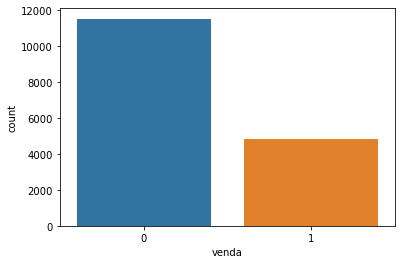

In [50]:
# Visualizando a distibuição das classes que compõem a venda

sns.countplot(data['venda'], label="Count")

In [51]:
# Contadondo e % da distibuição das classes que compõem a coluna venda

Count_Normal_transacation = len(data[data['venda']==0])
Count_Fraud_transacation = len(data[data['venda']==1]) 

Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of normal transacation       :', Percentage_of_Normal_transacation)
print('Number of normal transaction   :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of fraud transacation        :',Percentage_of_Fraud_transacation*100)
print('Number of fraud transaction    :', Count_Fraud_transacation)

% of normal transacation       : 0.7048119198827553
Number of normal transaction   : 11542
% of fraud transacation        : 29.518808011724474
Number of fraud transaction    : 4834


* O conjunto de dados é desequilibrado, a classe positiva (fraudes) representa 30% de todas as transações.

* MinMaxScaler - Redução dimensionalidade da variáveis preditoras

In [52]:
# Retirando a alta dimensionalidade das variáveis preditoras
# Normalização Min-Max dos dados
cols = ['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
        'sum_recharge', 'recharge_frequency', 'rec_online_10',
        'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
        'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
        'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
        'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
        'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
        'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
        'clube', 'pre_mix_giga', 'entretenimento', 'games',
        'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
        'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
        'servicos_operadora', 'sms_cobrar', 'sms_internacional',
        'transf_entre_regionais', 'truecaller']
for col in cols:
    # Ajustar aos dados e transformá-los.
    data[col] = MinMaxScaler().fit_transform(data[col].values.reshape(-1,1))

* Definindo:

* X - Preditoras Perguntas;

* Y - Classes Resposta;

In [53]:
# def X and Y 
Y=np.array(data.venda.tolist())
df=data.drop('venda', axis=1)
X=np.array(df.to_numpy())
seed=42

In [54]:
X.shape

(16376, 45)

In [55]:
Y.shape

(16376,)

* StratifiedKFold

* Um modelo é treinado usando K - 1 das dobras como dados de treinamento;

* o modelo resultante é validado na parte restante dos dados (ou seja, é usado como um conjunto de teste para calcular uma medida de desempenho, como precisão).

* A medida de desempenho relatada pela validação cruzada k -fold é então a média dos valores calculados no loop. Essa abordagem pode ser computacionalmente cara, mas não desperdiça muitos dados (como é o caso ao se fixar um conjunto de validação arbitrário), o que é uma grande vantagem em problemas como inferência inversa, onde o número de amostras é muito pequeno.

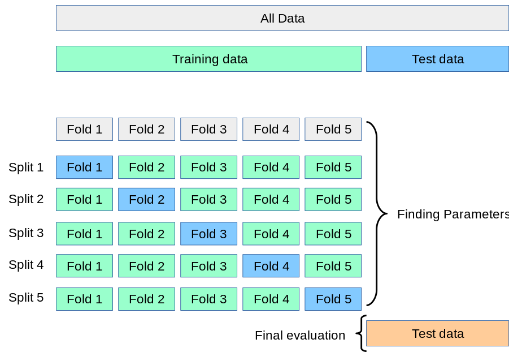

In [56]:
# StratifiedKFold k = 5
skf=StratifiedKFold(n_splits=5, 
                    shuffle=True, 
                    random_state=seed)
for train_index, test_index in skf.split(X, Y):
    print("TRAIN:", train_index,  "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

TRAIN: [    0     1     2 ... 16371 16373 16374] TEST: [   11    12    17 ... 16370 16372 16375]
TRAIN: [    0     1     4 ... 16371 16372 16375] TEST: [    2     3     5 ... 16368 16373 16374]
TRAIN: [    0     2     3 ... 16373 16374 16375] TEST: [    1     4    10 ... 16352 16365 16371]
TRAIN: [    0     1     2 ... 16373 16374 16375] TEST: [    6    13    16 ... 16361 16363 16367]
TRAIN: [    1     2     3 ... 16373 16374 16375] TEST: [    0     7     9 ... 16360 16364 16366]


In [57]:
X_train.shape

(13101, 45)

In [58]:
X_test.shape

(3275, 45)

In [59]:
Y_train.shape

(13101,)

In [60]:
Y_test.shape

(3275,)

* Aplicando modelo ensamble RandomForestClassifier para obter as variáveis preditoras importantes

In [61]:
# Ajustar o modelo usando X como dados de treinamento e y como valores de destino
rfc=RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
rfc=rfc.fit(X_train, Y_train)

* Variáveis preditoras
* Plote feature importance

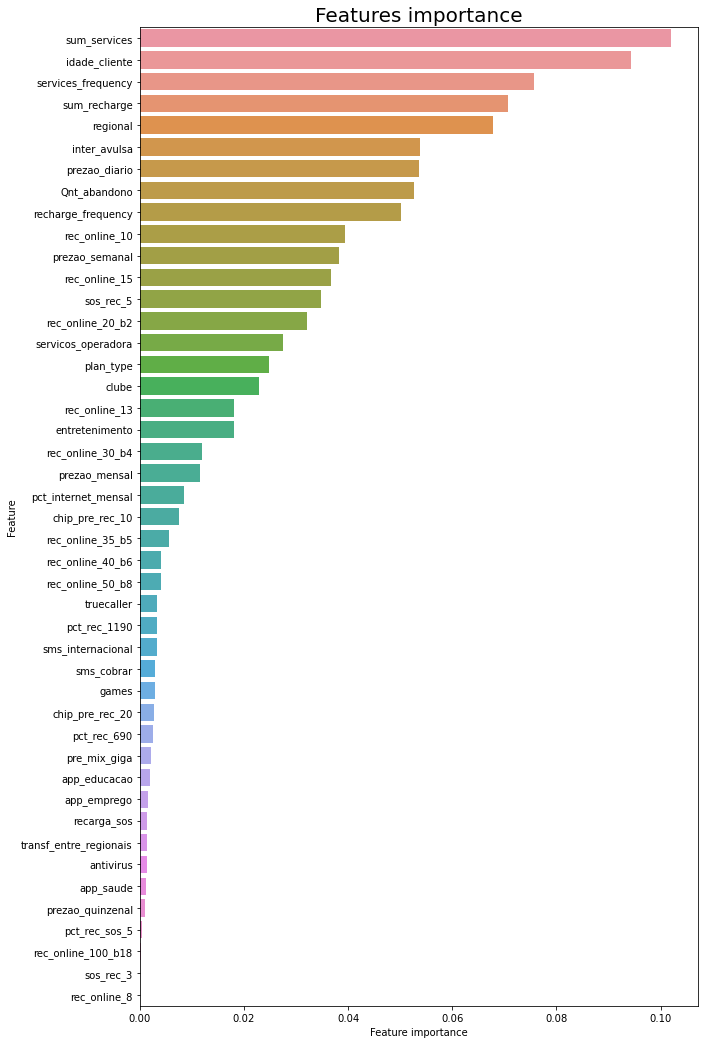

In [62]:
# Variaveis preditoras
predictors=['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
            'sum_recharge', 'recharge_frequency', 'rec_online_10',
            'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
            'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
            'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
            'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
            'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
            'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
            'clube', 'pre_mix_giga', 'entretenimento', 'games',
            'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
            'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
            'servicos_operadora', 'sms_cobrar', 'sms_internacional',
            'transf_entre_regionais', 'truecaller']

# Plote feature importance
plot_feature_importance(rfc)

* Drop das variáveis preditoras que não tem relevância ou está com coeficiente invalido

In [63]:
# Drop variáveis
to_drop=['rec_online_8', 'sos_rec_3', 'rec_online_100_b18', 'pct_rec_sos_5',
         'prezao_quinzenal', 'antivirus', 'app_saude', 'app_emprego', 'recarga_sos',
         'transf_entre_regionais', 'pre_mix_giga', 'app_educacao', 'pct_rec_690',
         'chip_pre_rec_20', 'games', 'sms_cobrar', 'pct_rec_1190','truecaller', 
         'sms_internacional']
data.drop(to_drop, axis=1, inplace=True)

* Resultados obtidos novo dataset

In [64]:
# Informações do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   regional             16376 non-null  float64
 1   idade_cliente        16376 non-null  float64
 2   plan_type            16376 non-null  float64
 3   Qnt_abandono         16376 non-null  float64
 4   sum_recharge         16376 non-null  float64
 5   recharge_frequency   16376 non-null  float64
 6   rec_online_10        16376 non-null  float64
 7   rec_online_35_b5     16376 non-null  float64
 8   rec_online_15        16376 non-null  float64
 9   sos_rec_5            16376 non-null  float64
 10  rec_online_20_b2     16376 non-null  float64
 11  chip_pre_rec_10      16376 non-null  float64
 12  rec_online_13        16376 non-null  float64
 13  rec_online_50_b8     16376 non-null  float64
 14  rec_online_30_b4     16376 non-null  float64
 15  rec_online_40_b6     16376 non-null 

* Matriz de correlação das variáveis preditoras e variável alvo venda

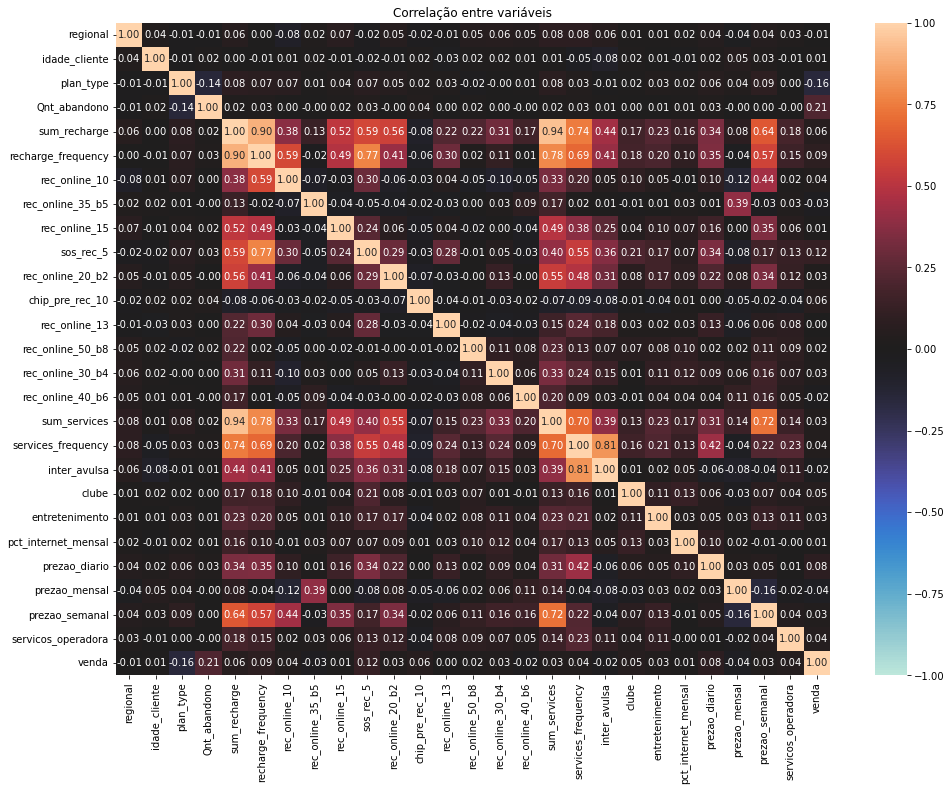

In [65]:
# Matriz de correlação
plt.figure(figsize=(16, 12))
sns.heatmap((data).corr(),
            annot=True,
            fmt='.2f',
            vmin=-1, 
            vmax=1, 
            center=0)
plt.title('Correlação entre variáveis')
plt.show()

* Estimativas de densidades das variáveis com alguma correlação linear mais forte com a variável alvo venda

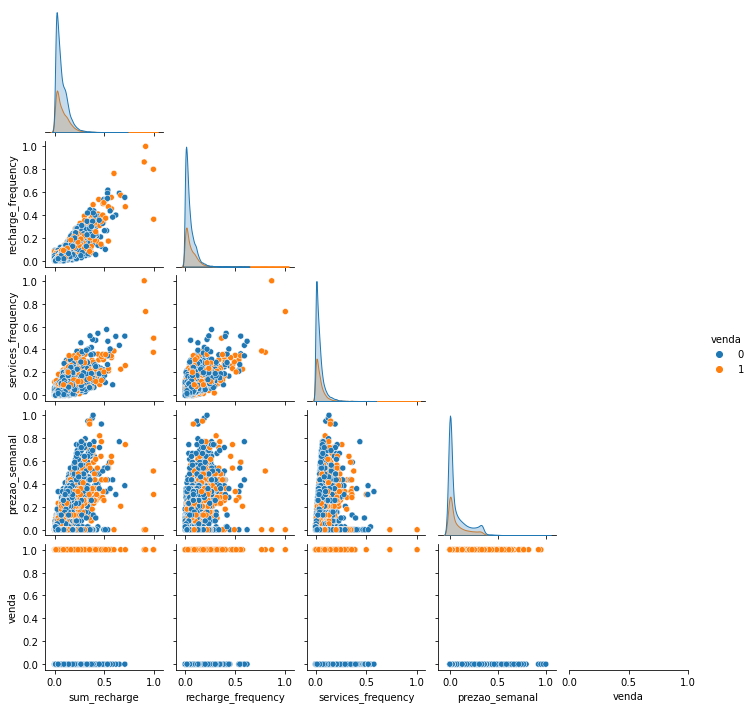

In [66]:
sns.pairplot(data, hue="venda", vars=['sum_recharge', 
                                      'recharge_frequency', 
                                      'services_frequency', 
                                      'prezao_semanal', 
                                      'venda'], size=2, diag_kind="kde", corner=True);

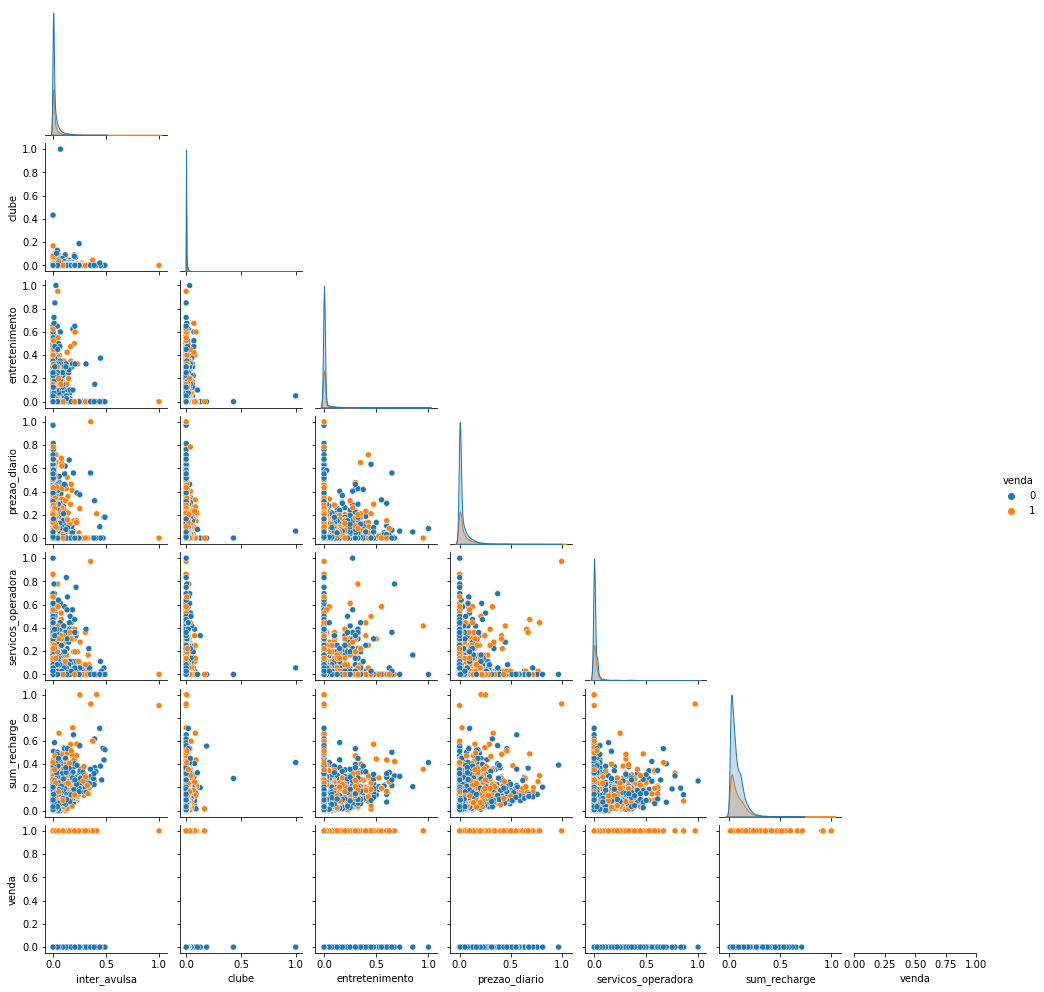

In [67]:
sns.pairplot(data, hue="venda", vars=['inter_avulsa', 
                                      'clube', 
                                      'entretenimento', 
                                      'prezao_diario',
                                      'servicos_operadora',
                                      'sum_recharge',
                                      'venda'], size=2, diag_kind="kde", corner=True);

* Correlação das variáveis preditoras com a variável alvo venda

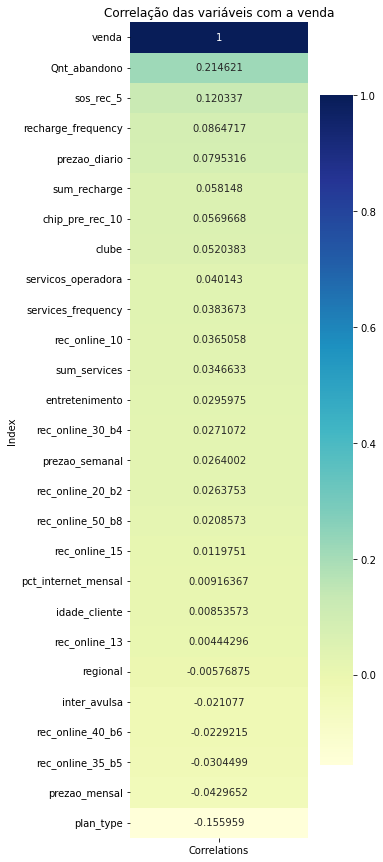

In [68]:
# Correlação das variáveis preditoras com a variável alvo venda
corr=data.corrwith(data['venda']).reset_index()
corr.columns=['Index','Correlations']
corr=corr.set_index('Index')
corr=corr.sort_values(by=['Correlations'], ascending=False)
plt.figure(figsize=(4,15))
fig=sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlação das variáveis com a venda")
plt.show()

* Estimativas de densidades das variáveis com alguma correlação linear mais forte com a variável alvo venda

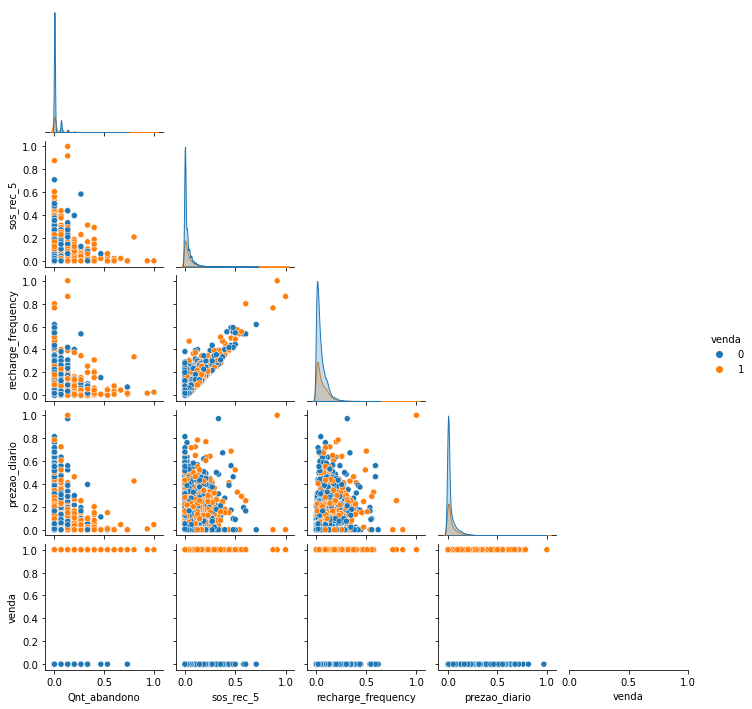

In [70]:
sns.pairplot(data, hue="venda", vars=['Qnt_abandono', 
                                      'sos_rec_5', 
                                      'recharge_frequency', 
                                      'prezao_diario',
                                      'venda'], size=2, diag_kind="kde", corner=True);

* Describe dataset

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
regional,16376.0,0.608566,0.352356,0.0,0.250000,0.625000,1.000000,1.0
idade_cliente,16376.0,0.240506,0.201909,0.0,0.010000,0.260000,0.380000,1.0
plan_type,16376.0,0.906815,0.288616,0.0,1.000000,1.000000,1.000000,1.0
Qnt_abandono,16376.0,0.017404,0.049366,0.0,0.000000,0.000000,0.000000,1.0
sum_recharge,16376.0,0.072971,0.068082,0.0,0.026478,0.052957,0.104148,1.0
recharge_frequency,16376.0,0.048489,0.056712,0.0,0.009091,0.027273,0.072727,1.0
rec_online_10,16376.0,0.057975,0.099993,0.0,0.000000,0.030303,0.060606,1.0
rec_online_35_b5,16376.0,0.008671,0.048487,0.0,0.000000,0.000000,0.000000,1.0
rec_online_15,16376.0,0.035979,0.068249,0.0,0.000000,0.000000,0.055556,1.0
sos_rec_5,16376.0,0.027193,0.050583,0.0,0.000000,0.000000,0.041667,1.0


* Gráfico de densidade para visualizar a distribuição de observações do conjunto de dados de recargas, serviços e Lead.

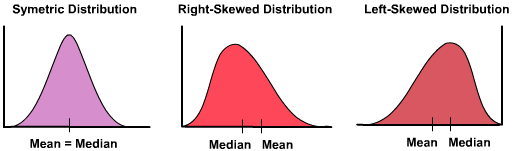

* Variáveis preditoras de recarga com redução de dimensionalidade

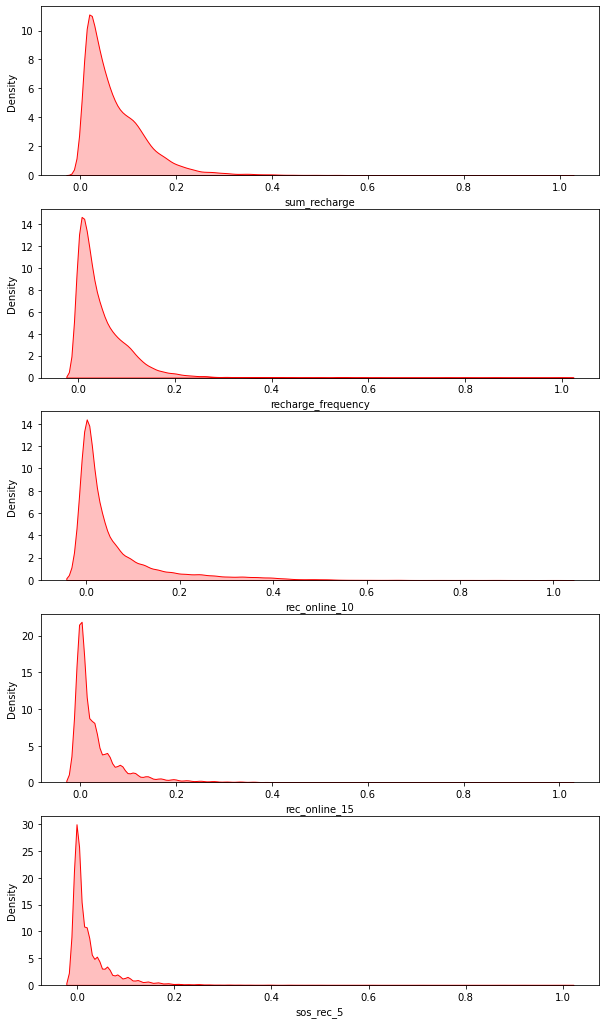

In [72]:
# Plote gráfico densidade das variáveis
f, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(5, 1, figsize=( 10, 18))
sns.kdeplot(data['sum_recharge'],shade=True, ax=ax1, color='red')
sns.kdeplot(data['recharge_frequency'],shade=True, ax=ax2, color='red')
sns.kdeplot(data['rec_online_10'],shade=True, ax=ax3, color='red')
sns.kdeplot(data['rec_online_15'],shade=True, ax=ax4, color='red')
sns.kdeplot(data['sos_rec_5'],shade=True, ax=ax5, color='red')
plt.show()

* Variáveis preditas de serviços com redução de dimensionalidade

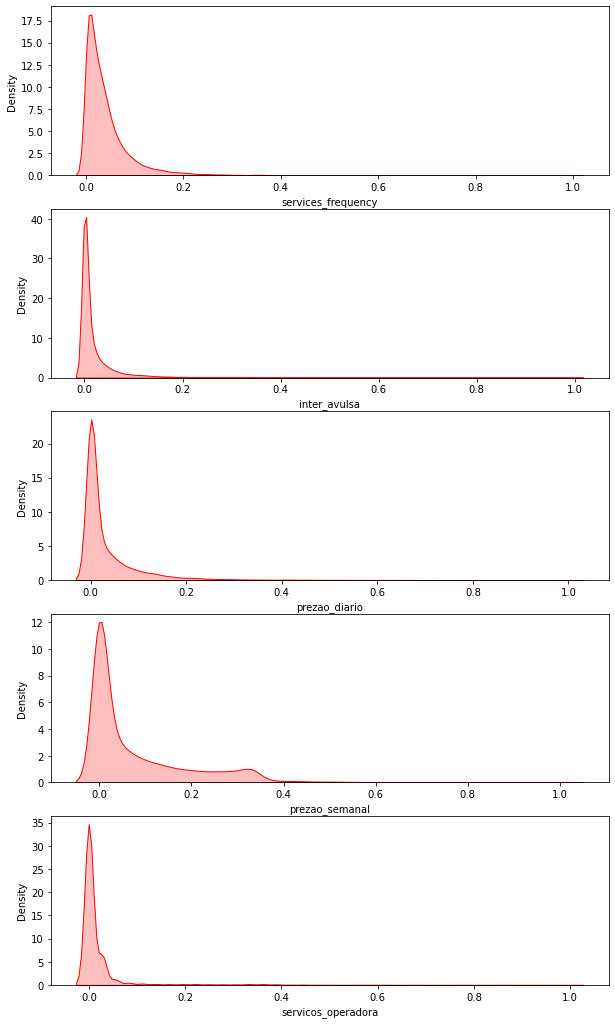

In [73]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=( 10, 18))
sns.kdeplot(data['services_frequency'],shade=True, ax=ax1, color='red')
sns.kdeplot(data['inter_avulsa'],shade=True, ax=ax2, color='red')
sns.kdeplot(data['prezao_diario'],shade=True, ax=ax3, color='red')
sns.kdeplot(data['prezao_semanal'],shade=True, ax=ax4, color='red')
sns.kdeplot(data['servicos_operadora'],shade=True, ax=ax5, color='red')
plt.show()

* Variáveis Lead com redução de dimensionalidade

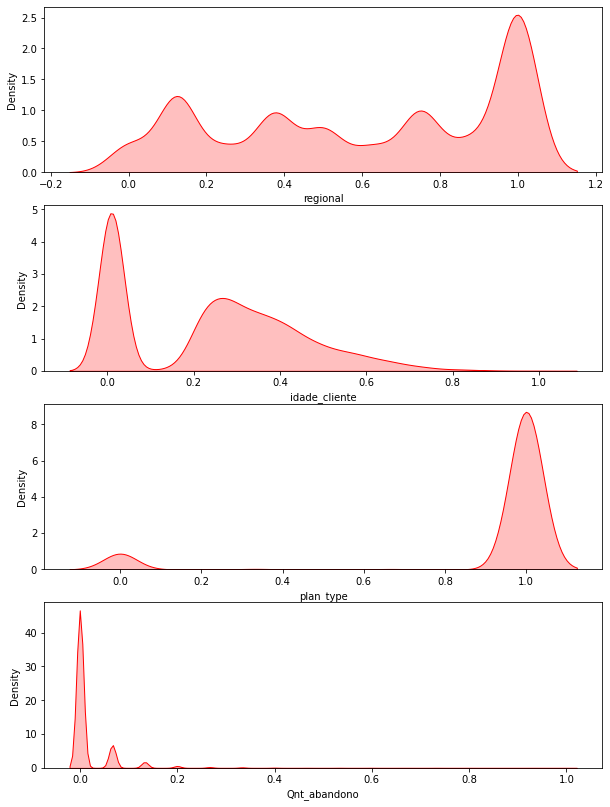

In [74]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=( 10, 14))
sns.kdeplot(data['regional'],shade=True, ax=ax1, color='red')
sns.kdeplot(data['idade_cliente'],shade=True, ax=ax2, color='red')
sns.kdeplot(data['plan_type'],shade=True, ax=ax3, color='red')
sns.kdeplot(data['Qnt_abandono'],shade=True, ax=ax4, color='red')
plt.show()

* Gerando .csv para criação Modelos de Machine Learning

In [68]:
# Get .csv
data.to_csv('data.csv', sep=';', index=False)